In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [4]:
dataset = pd.read_csv('Iris.csv')
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.drop(columns = ['Id'], inplace = True)
dataset.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [6]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

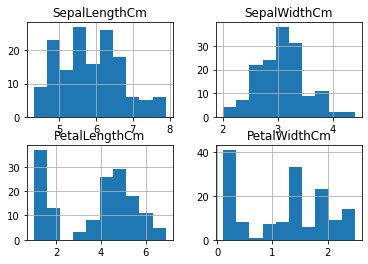

In [9]:
dataset.hist()
plt.show()

In [10]:
dataset.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
colors = ['red', 'green', 'blue']
Species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

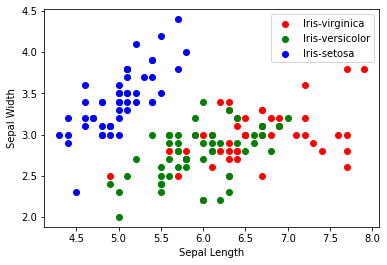

In [12]:
for i in range(3):
  x = dataset[dataset['Species'] == Species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = Species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

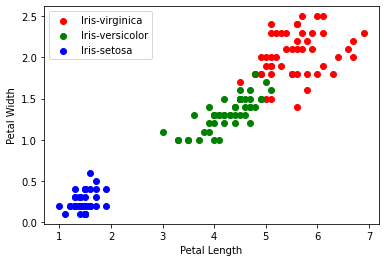

In [13]:
for i in range(3):
  x = dataset[dataset['Species'] == Species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = Species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

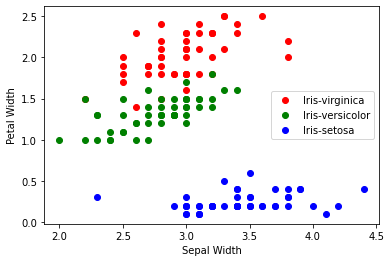

In [14]:
for i in range(3):
  x = dataset[dataset['Species'] == Species[i]]
  plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = Species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

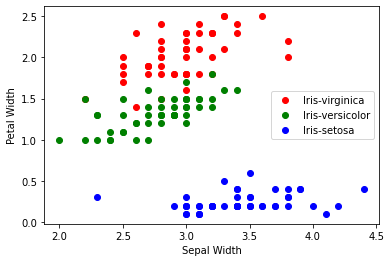

In [15]:
for i in range(3):
  x = dataset[dataset['Species'] == Species[i]]
  plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = Species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

In [16]:
from ctypes import sizeof
from sklearn.model_selection import train_test_split
X = dataset.drop(columns=['Species'])
Y = dataset['Species']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state = 42)
print('Size of training dataset : ', len(X_train))
print('Size of testing dataset : ', len(X_test))

Size of training dataset :  105
Size of testing dataset :  45


In [17]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
expected = np.array(y_test)
predicted = LR_model.predict(X_test)

In [19]:
print("Accuracy of Logistic Regression Model :", LR_model.score(X_test, y_test)*100)


Accuracy of Logistic Regression Model : 100.0


In [20]:

from sklearn import metrics
print('...confusion Matrix...')
print(metrics.confusion_matrix(expected, predicted))

...confusion Matrix...
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [21]:

print(metrics.classification_report(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [22]:
for i in range(len(predicted)):
  print('Predicted : ' + predicted[i] + ' |  Actual : ' + expected[i])

Predicted : Iris-versicolor |  Actual : Iris-versicolor
Predicted : Iris-setosa |  Actual : Iris-setosa
Predicted : Iris-virginica |  Actual : Iris-virginica
Predicted : Iris-versicolor |  Actual : Iris-versicolor
Predicted : Iris-versicolor |  Actual : Iris-versicolor
Predicted : Iris-setosa |  Actual : Iris-setosa
Predicted : Iris-versicolor |  Actual : Iris-versicolor
Predicted : Iris-virginica |  Actual : Iris-virginica
Predicted : Iris-versicolor |  Actual : Iris-versicolor
Predicted : Iris-versicolor |  Actual : Iris-versicolor
Predicted : Iris-virginica |  Actual : Iris-virginica
Predicted : Iris-setosa |  Actual : Iris-setosa
Predicted : Iris-setosa |  Actual : Iris-setosa
Predicted : Iris-setosa |  Actual : Iris-setosa
Predicted : Iris-setosa |  Actual : Iris-setosa
Predicted : Iris-versicolor |  Actual : Iris-versicolor
Predicted : Iris-virginica |  Actual : Iris-virginica
Predicted : Iris-versicolor |  Actual : Iris-versicolor
Predicted : Iris-versicolor |  Actual : Iris-ver